# Imports

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score

In [33]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [34]:
import warnings
warnings.filterwarnings("ignore")

# DataMod

In [35]:
# data_test = pd.read_csv("data/test.csv")
# data_train = pd.read_csv("data/train.csv")

In [36]:
data = pd.read_csv("data/train.csv")
data

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
0,0,1,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,60.0,17.2,1
1,1,2,1019.5,16.2,16.9,15.8,15.4,95.0,91.0,0.0,50.0,21.9,1
2,2,3,1024.1,19.4,16.1,14.6,9.3,75.0,47.0,8.3,70.0,18.1,1
3,3,4,1013.4,18.1,17.8,16.9,16.8,95.0,95.0,0.0,60.0,35.6,1
4,4,5,1021.8,21.3,18.4,15.2,9.6,52.0,45.0,3.6,40.0,24.8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2185,2185,361,1014.6,23.2,20.6,19.1,19.9,97.0,88.0,0.1,40.0,22.1,1
2186,2186,362,1012.4,17.2,17.3,16.3,15.3,91.0,88.0,0.0,50.0,35.3,1
2187,2187,363,1013.3,19.0,16.3,14.3,12.6,79.0,79.0,5.0,40.0,32.9,1
2188,2188,364,1022.3,16.4,15.2,13.8,14.7,92.0,93.0,0.1,40.0,18.0,1


<Axes: >

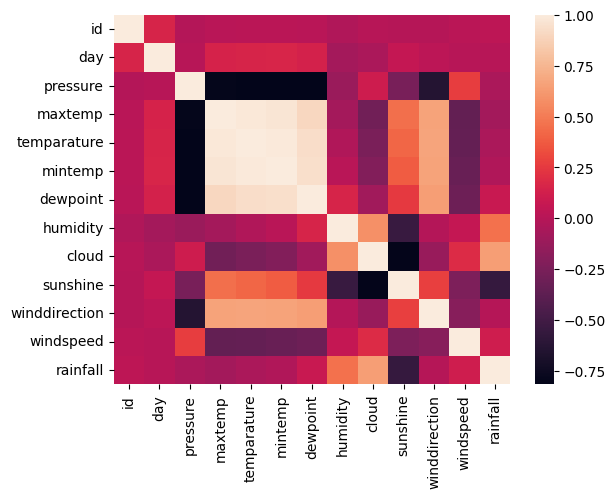

In [37]:
sns.heatmap(data.corr())

In [38]:
def data_clean(data):
    data.drop(['id', 'day', 'maxtemp', 'mintemp', 'sunshine'], axis=1, inplace=True, errors='ignore')
    data.fillna(data.median(), inplace=True)
    scaler = StandardScaler()
    X = scaler.fit_transform(data.drop('rainfall', axis=1))
    y = data['rainfall']
    return X, y

In [39]:
X, y = data_clean(data)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42,
    stratify=y  # Сохранение баланса классов
)

<Axes: >

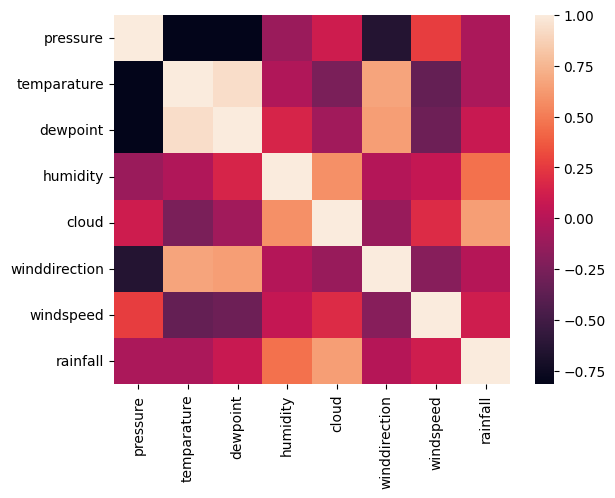

In [40]:
sns.heatmap(data.corr())

# Models

## Graph

In [41]:
def plot_results(history, title):
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history["accuracy"], label="Train Accuracy")
    plt.plot(history.history["val_accuracy"], label="Test Accuracy")
    plt.title(f"{title} - Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history["loss"], label="Train Loss")
    plt.plot(history.history["val_loss"], label="Test Loss")
    plt.title(f"{title} - Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()

    plt.show()

## Полносвязная

### Compile

In [42]:
model_fnn = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.1),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_fnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [43]:
history_fnn = model_fnn.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

Epoch 1/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.6947 - loss: 0.5864 - val_accuracy: 0.8832 - val_loss: 0.3315
Epoch 2/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8469 - loss: 0.3659 - val_accuracy: 0.8803 - val_loss: 0.3063
Epoch 3/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8686 - loss: 0.3432 - val_accuracy: 0.8746 - val_loss: 0.3110
Epoch 4/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8692 - loss: 0.3209 - val_accuracy: 0.8746 - val_loss: 0.3115
Epoch 5/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8709 - loss: 0.3435 - val_accuracy: 0.8746 - val_loss: 0.3097
Epoch 6/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8563 - loss: 0.3543 - val_accuracy: 0.8746 - val_loss: 0.3143
Epoch 7/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8730 - loss: 0.3134 - val_accuracy: 0.8689 - val_loss: 0.3174
Epoch 8/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8680 - loss: 0.3257 - val_accuracy: 0.8746 - val_loss

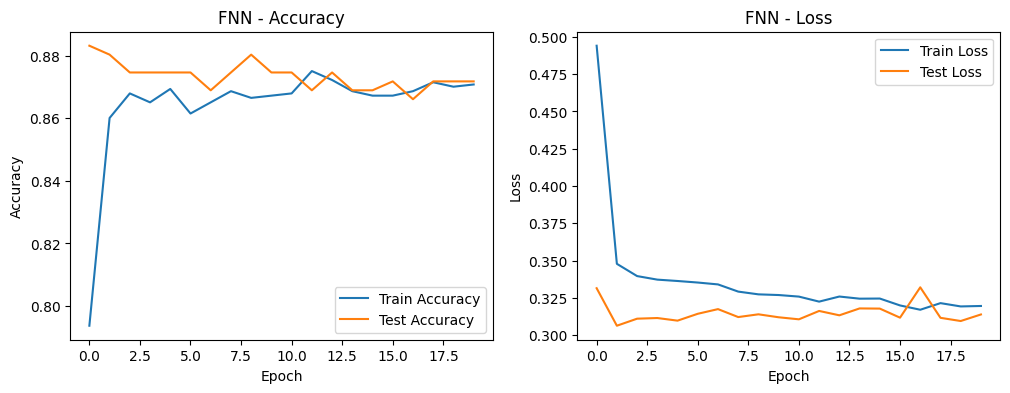

In [44]:
plot_results(history_fnn, "FNN")

In [45]:
model_fnn.save('models/model_fnn.keras')

### Test

In [46]:
model_fnn = load_model('models/model_fnn.keras')

In [47]:
y_pred_fnn = model_fnn.predict(X_test)
y_pred_fnn = (y_pred_fnn > 0.5).astype(int)
print(classification_report(y_test, y_pred_fnn))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_fnn))

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
              precision    recall  f1-score   support

           0       0.74      0.59      0.66       108
           1       0.87      0.93      0.90       330

    accuracy                           0.85       438
   macro avg       0.81      0.76      0.78       438
weighted avg       0.84      0.85      0.84       438

ROC-AUC: 0.7614478114478114


## RNN

### Complile

In [48]:
def create_sequences(data, targets, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i : i + window_size])
        y.append(targets[i + 1 : i + window_size + 1])  # Прогноз на следующие 7 дней
    return np.array(X), np.array(y)


window_size = 7
X_rnn, y_rnn = create_sequences(X, y, window_size)
X_train_rnn, X_test_rnn, y_train_rnn, y_test_rnn = train_test_split(
    X_rnn, y_rnn, test_size=0.2, shuffle=False
)

In [49]:
pd.DataFrame(y_rnn).value_counts()

0  1  2  3  4  5  6
1  1  1  1  1  1  1    498
0  1  1  1  1  1  1     94
1  1  1  1  1  1  0     93
   0  1  1  1  1  1     90
   1  0  1  1  1  1     89
                      ... 
0  1  0  1  0  0  0      2
1  0  0  0  1  0  0      2
         1  0  0  0      2
0  1  0  0  0  1  1      1
   0  1  0  0  0  1      1
Name: count, Length: 128, dtype: int64

In [50]:
model_rnn = Sequential([
    LSTM(64, input_shape=(window_size, X_train.shape[1]), return_sequences=True),
    Dropout(0.1),
    LSTM(32),
    # Dense(32),
    Dense(7, activation='sigmoid')
])

model_rnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [51]:
history_rnn = model_rnn.fit(
    X_train_rnn, y_train_rnn,
    epochs=20,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

Epoch 1/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - accuracy: 0.1699 - loss: 0.6531 - val_accuracy: 0.2143 - val_loss: 0.4940
Epoch 2/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.2013 - loss: 0.5245 - val_accuracy: 0.2571 - val_loss: 0.4801
Epoch 3/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.2804 - loss: 0.4986 - val_accuracy: 0.0914 - val_loss: 0.4739
Epoch 4/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.0697 - loss: 0.4986 - val_accuracy: 0.2086 - val_loss: 0.4699
Epoch 5/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.1605 - loss: 0.4931 - val_accuracy: 0.2457 - val_loss: 0.4646
Epoch 6/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.2604 - loss: 0.4865 - val_accuracy: 0.2600 - val_loss: 0.4602
Epoch 7/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.2341 - loss: 0.4832 - val_accuracy: 0.3000 - val_loss: 0.4598
Epoch 8/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.2334 - loss: 0.4728 - val_accuracy: 0.3457 - v

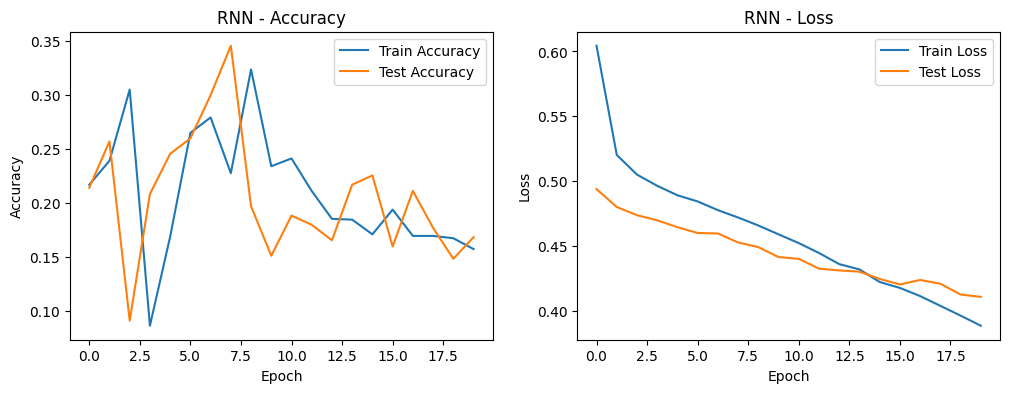

In [52]:
plot_results(history_rnn, "RNN")

In [53]:
model_rnn.save('models/model_rnn.keras')

### Test

In [54]:
model_rnn = load_model('models/model_rnn.keras')

In [55]:
y_pred_rnn = model_rnn.predict(X_test_rnn)
y_pred_rnn = (y_pred_rnn > 0.5).astype(int)
# Оценка для каждого из 7 дней
for i in range(7):
    print(f"Day {i+1}:")
    print(classification_report(y_test_rnn[:, i], y_pred_rnn[:, i]))

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step
Day 1:
              precision    recall  f1-score   support

           0       0.61      0.46      0.52        92
           1       0.86      0.92      0.89       345

    accuracy                           0.82       437
   macro avg       0.74      0.69      0.71       437
weighted avg       0.81      0.82      0.81       437

Day 2:
              precision    recall  f1-score   support

           0       0.64      0.49      0.56        92
           1       0.87      0.93      0.90       345

    accuracy                           0.84       437
   macro avg       0.76      0.71      0.73       437
weighted avg       0.82      0.84      0.83       437

Day 3:
              precision    recall  f1-score   support

           0       0.65      0.53      0.59        92
           1       0.88      0.92      0.90       345

    accuracy                           0.84       437
   macro avg       0.77      0.73      0.74       437
weighted avg 

In [56]:
X_test_rnn[:1].shape

(1, 7, 7)

In [57]:
yt = model_rnn.predict(X_test_rnn[:1])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


In [58]:
yt[0]

array([0.8017537 , 0.87410367, 0.92745394, 0.96003497, 0.96550035,
       0.71904814, 0.8810343 ], dtype=float32)